In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [12]:
type(data)

dict

In [13]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_26248\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942335e+07,1.942335e+07,False,NaN,1,NaN,NaN,None,2023-07-08T06:24:00.000Z,30169.770179,1.130970e+10,-49.8686,-0.184361,0.129468,-0.819546,14.552622,9.693988,7.945735,5.859980e+11,49.8493,6.335652e+11,None,2023-07-08T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:25:49.974708
1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202092e+08,1.202092e+08,True,NaN,2,NaN,NaN,None,2023-07-08T06:24:00.000Z,1857.275850,5.522618e+09,-42.6493,-0.192899,0.095594,-3.141273,1.162689,1.170872,1.121896,2.232616e+11,18.9697,2.232616e+11,None,2023-07-08T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:25:49.974708
2,825,Tether,USDT,tether,56535,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,None,2023-07-08T06:24:00.000Z,1.000176,1.833379e+10,-42.9459,0.005108,-0.003768,0.020122,0.021312,-0.037818,-0.042236,8.337537e+10,7.0841,8.574605e+10,None,2023-07-08T06:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-08 06:25:49.974708
3,1839,BNB,BNB,bnb,1488,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558501e+08,1.558501e+08,False,NaN,4,NaN,NaN,None,2023-07-08T06:24:00.000Z,235.520153,3.729440e+08,-34.8145,0.007041,0.724393,-2.340296,-9.153859,-24.860461,-24.139193,3.670584e+10,3.1187,3.670584e+10,None,2023-07-08T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:25:49.974708
4,3408,USD Coin,USDC,usd-coin,13233,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.750487e+10,2.750487e+10,False,NaN,5,NaN,NaN,None,2023-07-08T06:24:00.000Z,1.000097,2.713363e+09,-39.3415,0.020878,0.006166,-0.012204,0.018666,0.016354,-0.001684,2.750755e+10,2.3379,2.750755e+10,None,2023-07-08T06:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-08 06:25:49.974708
5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-08T06:24:00.000Z,0.466404,5.733545e+08,-41.2801,-0.032467,-0.436458,-0.275107,-10.322406,9.709779,-7.530529,2.437160e+10,2.0726,4.664039e+10,None,2023-07-08T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:25:49.974708
6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.496130e+10,3.595238e+10,False,NaN,7,NaN,NaN,None,2023-07-08T06:24:00.000Z,0.283373,1.892443e+08,-36.1651,0.067468,0.590706,-0.570500,-12.440060,-21.987541,-26.492715,9.907102e+09,0.8418,1.275180e+10,None,2023-07-08T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:25:49.974708
7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400844e+11,1.400844e+11,True,NaN,8,NaN,NaN,None,2023-07-08T06:24:00.000Z,0.065103,1.842316e+08,-35.3136,0.066640,-0.564264,-4.530774,-3.476541,-10.131546,-20.274803,9.119918e+09,0.7749,9.119918e+09,None,2023-07-08T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:25:49.974708
8,5426,Solana,SOL,solana,483,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",Na

In [62]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df
    
    if not os.path.isfile(r'C:\APIs\API.csv'):
        df.to_csv(r'C:\APIs\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\APIs\API.csv', mode='a', header=False)


In [65]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed")
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [67]:
df72 = pd.read_csv(r'C:\APIs\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19423350.00000,19423350.00000,False,NaN,1,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,30181.33653,11165333971.87236,-50.26910,-0.20419,0.14580,-0.87450,14.18163,9.49421,8.27892,586222662814.06580,49.88420,633808067047.93005,NaN,2023-07-08T07:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 15:03:02.735237
1,1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120209152.47108,120209152.47108,True,NaN,2,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,1857.54623,5547782745.58065,-42.28760,-0.27820,0.08335,-3.27840,0.93842,0.96863,1.23733,223294058189.76999,18.99980,223294058189.76999,NaN,2023-07-08T07:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 15:03:02.735237
2,2,825,Tether,USDT,tether,56535,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83360717914.11366,85730981418.02776,True,NaN,3,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,1.00017,18221804436.43893,-43.06670,0.01369,0.00945,0.02759,0.01044,-0.04291,-0.03324,83374571205.40836,7.09420,85745228611.28999,NaN,2023-07-08T07:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-08 15:03:02.735237
3,3,1839,BNB,BNB,bnb,1488,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155850093.81952,155850093.81952,False,NaN,4,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,235.73399,367075439.61029,-35.88530,-0.01390,0.81687,-2.44185,-9.42343,-24.77950,-24.00121,36739163740.72730,3.12620,36739163740.73000,NaN,2023-07-08T07:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 15:03:02.735237
4,4,3408,USD Coin,USDC,usd-coin,13233,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,27504870254.32475,27504870254.32475,False,NaN,5,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,1.00006,2690301723.83391,-39.54390,0.01128,0.00911,-0.01431,0.00934,0.00343,0.01356,27506508436.79457,2.34060,27506508436.79000,NaN,2023-07-08T07:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-08 15:03:02.735237
5,5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52254289650.00000,99988655562.00000,False,NaN,6,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,0.46700,555307628.95795,-43.17500,-0.05655,0.13986,-0.85368,-10.24106,10.37556,-7.38543,24402924861.59166,2.07650,46700328384.60000,NaN,2023-07-08T07:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 15:03:02.735237
6,6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34961295309.43700,35952377800.23500,False,NaN,7,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,0.28538,190437000.43823,-34.31670,0.73352,1.36635,-0.01193,-12.66053,-21.29390,-26.09396,9977407713.84941,0.84900,12842297264.71000,NaN,2023-07-08T07:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 15:03:02.735237
7,7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140084406383.70523,140084406383.70523,True,NaN,8,NaN,NaN,NaN,2023-07-08T07:01:00.000Z,0.06509,183192213.32469,-35.16510,-0.08745,-0.66973,-4.81645,-3.95592,-10.10599,-20.34115,9118751007.83844,0.77590,9118751007.84000,NaN,2023-07-0

In [68]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [69]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19423350.00000,19423350.00000,False,NaN,1,NaN,NaN,None,2023-07-08T08:01:00.000Z,30204.32413,10798833384.86049,-51.51920,0.07616,0.65504,-0.83591,14.21352,9.14058,8.17135,586669159002.65503,49.86620,634290806635.08997,None,2023-07-08T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 16:02:44.761796
1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120209152.47108,120209152.47108,True,NaN,2,NaN,NaN,None,2023-07-08T08:01:00.000Z,1862.26482,5414114285.66217,-43.57560,0.25402,0.30362,-2.99380,1.09956,0.68789,1.38655,223861275263.39484,19.02500,223861275263.39001,None,2023-07-08T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 16:02:44.761796
2,825,Tether,USDT,tether,56536,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83360717914.11366,85730981418.02776,True,NaN,3,NaN,NaN,None,2023-07-08T08:01:00.000Z,1.00022,17726151919.77140,-44.47360,0.00490,0.01975,0.03204,0.02373,-0.05739,-0.04029,83378659880.32317,7.08600,85749433542.84000,None,2023-07-08T08:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-08 16:02:44.761796
3,1839,BNB,BNB,bnb,1488,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155850093.81952,155850093.81952,False,NaN,4,NaN,NaN,None,2023-07-08T08:01:00.000Z,236.06688,361073306.30356,-36.53150,0.14122,1.17885,-2.46730,-9.52789,-25.18662,-23.89297,36791045649.04729,3.12700,36791045649.05000,None,2023-07-08T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 16:02:44.761796
4,3408,USD Coin,USDC,usd-coin,13233,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27504870254.32475,27504870254.32475,False,NaN,5,NaN,NaN,None,2023-07-08T08:01:00.000Z,1.00006,2607663938.28994,-41.65940,0.00035,0.00135,-0.00256,0.01162,-0.01255,0.00891,27506604289.11103,2.33810,27506604289.11000,None,2023-07-08T08:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-08 16:02:44.761796
5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52254289650.00000,99988655562.00000,False,NaN,6,NaN,NaN,None,2023-07-08T08:01:00.000Z,0.46734,516316509.46689,-47.61280,0.07282,0.82875,-0.72980,-10.19364,9.71790,-7.24587,24420693931.92632,2.07570,46734333382.96000,None,2023-07-08T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 16:02:44.761796
6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34961295309.43700,35952377800.23500,False,NaN,7,NaN,NaN,None,2023-07-08T08:01:00.000Z,0.28468,203622851.51480,-29.45770,-0.24728,1.70224,-0.49930,-13.15006,-22.03208,-26.34448,9952735322.58468,0.84580,12810540500.64000,None,2023-07-08T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 16:02:44.761796
7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140084406383.70523,140084406383.70523,True,NaN,8,NaN,NaN,None,2023-07-08T08:01:00.000Z,0.06526,178531958.05067,-37.08110,0.25651,0.01209,-4.10246,-3.73334,-10.44176,-20.06648,9142141801.42330,0.77700,9142141801.42000,None,2023-07-08T08:01:00.000Z,

In [70]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07616,0.65504,-0.83591,14.21352,9.14058,8.17135
Ethereum,0.25402,0.30362,-2.99380,1.09956,0.68789,1.38655
Tether,0.00490,0.01975,0.03204,0.02373,-0.05739,-0.04029
BNB,0.14122,1.17885,-2.46730,-9.52789,-25.18662,-23.89297
USD Coin,0.00035,0.00135,-0.00256,0.01162,-0.01255,0.00891
XRP,0.07282,0.82875,-0.72980,-10.19364,9.71790,-7.24587
Cardano,-0.24728,1.70224,-0.49930,-13.15006,-22.03208,-26.34448
Dogecoin,0.25651,0.01209,-4.10246,-3.73334,-10.44176,-20.06648
Solana,1.84696,13.16946,19.33303,18.05373,6.29308,9.89620


In [71]:
df4=df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.07616
                 quote.USD.percent_change_24h     0.65504
                 quote.USD.percent_change_7d     -0.83591
                 quote.USD.percent_change_30d    14.21352
                 quote.USD.percent_change_60d     9.14058
                 quote.USD.percent_change_90d     8.17135
Ethereum         quote.USD.percent_change_1h      0.25402
                 quote.USD.percent_change_24h     0.30362
                 quote.USD.percent_change_7d     -2.99380
                 quote.USD.percent_change_30d     1.09956
                 quote.USD.percent_change_60d     0.68789
                 quote.USD.percent_change_90d     1.38655
Tether           quote.USD.percent_change_1h      0.00490
                 quote.USD.percent_change_24h     0.01975
                 quote.USD.percent_change_7d      0.03204
                 quote.USD.percent_change_30d     0.02373
                 quote.USD

In [72]:
type(df3)


pandas.core.frame.DataFrame

In [73]:
type(df4)

pandas.core.series.Series

In [74]:
df5=df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.07616
                quote.USD.percent_change_24h   0.65504
                quote.USD.percent_change_7d   -0.83591
                quote.USD.percent_change_30d  14.21352
                quote.USD.percent_change_60d   9.14058
                quote.USD.percent_change_90d   8.17135
Ethereum        quote.USD.percent_change_1h    0.25402
                quote.USD.percent_change_24h   0.30362
                quote.USD.percent_change_7d   -2.99380
                quote.USD.percent_change_30d   1.09956
                quote.USD.percent_change_60d   0.68789
                quote.USD.percent_change_90d   1.38655
Tether          quote.USD.percent_change_1h    0.00490
                quote.USD.percent_change_24h   0.01975
                quote.USD.percent_change_7d    0.03204
                quote.USD.percent_change_30d   0.02373
                quote.USD.percent_change_60d  -0.05739
                quote.USD.percent_change_90d  -0.04029
BNB             quote.USD.percent_change_1h    0.14122
                quote.USD.percent_change_24h   1.17885
                quote.USD.percent_change_7d   -2.46730
                quote.USD.percent_change_30d  -9.52789
                quote.USD.percent_change_60d -25.18662
                quote.USD.percent_change_90d -23.89297
USD Coin        quote.USD.percent_change_1h    0.00035
                quote.USD.percent_change_24h   0.00135
                quote.USD.percent_change_7d   -0.00256
                quote.USD.percent_change_30d   0.01162
                quote.USD.percent_change_60d  -0.01255
                quote.USD.percent_change_90d   0.00891
XRP             quote.USD.percent_change_1h    0.07282
                quote.USD.percent_change_24h   0.82875
                quote.USD.percent_change_7d   -0.72980
                quote.USD.percent_change_30d -10.19364
                quote.USD.percent_change_60d   9.71790
                quote.USD.percent_change_90d  -7.24587
Cardano         quote.USD.percent_change_1h   -0.24728
                quote.USD.percent_change_24h   1.70224
                quote.USD.percent_change_7d   -0.49930
                quote.USD.percent_change_30d -13.15006
                quote.USD.percent_change_60d -22.03208
                quote.USD.percent_change_90d -26.34448
Dogecoin        quote.USD.percent_change_1h    0.25651
                quote.USD.percent_change_24h   0.01209
                quote.USD.percent_change_7d   -4.10246
                quote.USD.percent_change_30d  -3.73334
                quote.USD.percent_change_60d -10.44176
                quote.USD.percent_change_90d -20.06648
Solana          quote.USD.percent_change_1h    1.84696
                quote.USD.percent_change_24h  13.16946
                quote.USD.percent_change_7d   19.33303
                quote.USD.percent_change_30d  18.05373
                quote.USD.percent_change_60d   6.29308
                quote.USD.percent_change_90d   9.89620
Litecoin        quote.USD.percent_change_1h    0.13549
                quote.USD.percent_change_24h   1.05998
                quote.USD.percent_change_7d   -9.10121
                quote.USD.percent_change_30d  10.31386
                quote.USD.percent_change_60d  23.43133
                quote.USD.percent_change_90d   7.69168
TRON            quote.USD.percent_change_1h    0.05974
                quote.USD.percent_change_24h   1.31764
                quote.USD.percent_change_7d    2.46005
                quote.USD.percent_change_30d   2.76998
                quote.USD.percent_change_60d  14.81156
                quote.USD.percent_change_90d  19.58264
Polygon         quote.USD.percent_change_1h    0.31797
                quote.USD.percent_change_24h   2.75313
                quote.USD.percent_change_7d    3.02225
                quote.USD.percent_change_30d -11.94429
                quote.USD.percent_change_60d -24.30193
                quote.USD.percent

In [75]:
df5.count()

values    90
dtype: int64

In [76]:
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07616
1,Bitcoin,quote.USD.percent_change_24h,0.65504
2,Bitcoin,quote.USD.percent_change_7d,-0.83591
3,Bitcoin,quote.USD.percent_change_30d,14.21352
4,Bitcoin,quote.USD.percent_change_60d,9.14058
5,Bitcoin,quote.USD.percent_change_90d,8.17135
6,Ethereum,quote.USD.percent_change_1h,0.25402
7,Ethereum,quote.USD.percent_change_24h,0.30362
8,Ethereum,quote.USD.percent_change_7d,-2.99380
9,Ethereum,quote.USD.percent_change_30d,1.09956


In [77]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07616
1,Bitcoin,quote.USD.percent_change_24h,0.65504
2,Bitcoin,quote.USD.percent_change_7d,-0.83591
3,Bitcoin,quote.USD.percent_change_30d,14.21352
4,Bitcoin,quote.USD.percent_change_60d,9.14058
5,Bitcoin,quote.USD.percent_change_90d,8.17135
6,Ethereum,quote.USD.percent_change_1h,0.25402
7,Ethereum,quote.USD.percent_change_24h,0.30362
8,Ethereum,quote.USD.percent_change_7d,-2.99380
9,Ethereum,quote.USD.percent_change_30d,1.09956


In [78]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07616
1,Bitcoin,24h,0.65504
2,Bitcoin,7d,-0.83591
3,Bitcoin,30d,14.21352
4,Bitcoin,60d,9.14058
5,Bitcoin,90d,8.17135
6,Ethereum,quote.USD.percent_change_1h,0.25402
7,Ethereum,24h,0.30362
8,Ethereum,7d,-2.99380
9,Ethereum,30d,1.09956


In [79]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.07616
1,Bitcoin,24h,0.65504
2,Bitcoin,7d,-0.83591
3,Bitcoin,30d,14.21352
4,Bitcoin,60d,9.14058
5,Bitcoin,90d,8.17135
6,Ethereum,1h,0.25402
7,Ethereum,24h,0.30362
8,Ethereum,7d,-2.99380
9,Ethereum,30d,1.09956


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

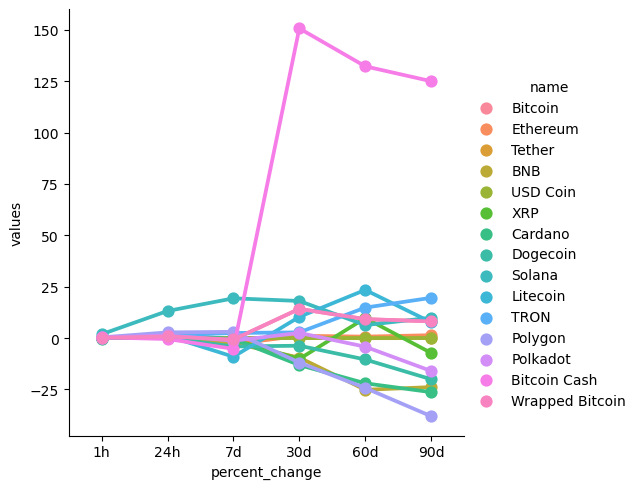

In [81]:
sns.catplot(x='percent_change',y='values', hue='name', data=df7, kind='point')

In [88]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Tether'")
df10


,name,quote.USD.price,timestamp
2,Tether,1.00022,2023-07-08 16:02:44.761796


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

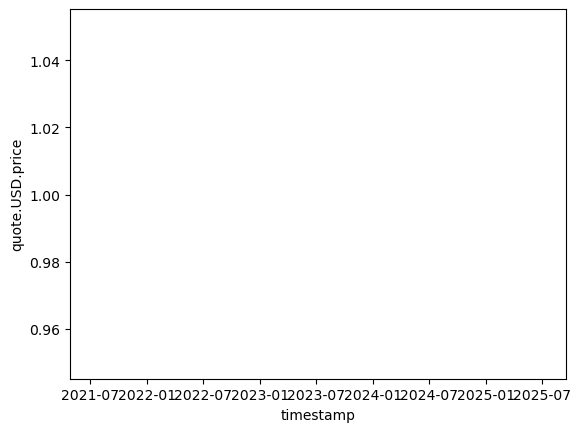

In [89]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)